In [1]:
%pip install torch
%pip install torchvision
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install pandas

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
%matplotlib inline

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import torch as tc
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
tc.cuda.is_available()

True

In [6]:
from torchvision import datasets, transforms

resize = transforms.Compose([transforms.Resize((227, 227)), transforms.ToTensor()])

dataset = datasets.ImageFolder(root="/content/drive/My Drive/Google Colab/BPLD", transform=resize)

In [7]:
print("Total number of samples is", len(dataset))

Total number of samples is 1000


In [8]:
print(dataset.classes[0], "is labelled as 0")
print(dataset.classes[1], "is labelled as 1")
print(dataset.classes[2], "is labelled as 2")
print(dataset.classes[3], "is labelled as 3")
print(dataset.classes[4], "is labelled as 4")

anthracnose is labelled as 0
healthy is labelled as 1
leaf crinckle is labelled as 2
powdery mildew is labelled as 3
yellow mosaic is labelled as 4


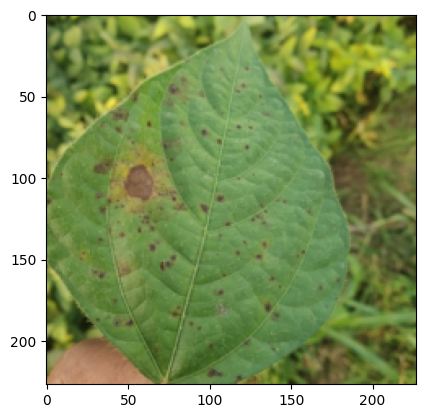

The leaf condition is anthracnose


In [42]:
image, label = dataset[100]

plt.imshow(image.permute(1, 2, 0).numpy())
plt.show()

print("The leaf condition is", dataset.classes[label])

In [10]:
from torch.utils.data import random_split, DataLoader

test_size = int(0.2 * len(dataset))
train_size = len(dataset) - test_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

The leaf condition is anthracnose


In [11]:
X_train, y_train = next(iter(DataLoader(train_dataset, batch_size=train_size)))
X_test, y_test = next(iter(DataLoader(test_dataset, batch_size=test_size)))

In [12]:
y = tc.cat((y_train, y_test)).numpy()

In [13]:
pd.Series(y).value_counts().sort_index()

0    230
1    220
2    150
3    180
4    220
Name: count, dtype: int64

In [14]:
pd.Series(y).value_counts().sort_values()

2    150
3    180
1    220
4    220
0    230
Name: count, dtype: int64

In [15]:
print("Size of X_train is", X_train.numpy().shape)
print("Size of y_train is", y_train.numpy().shape)
print("Size of X_test is", X_test.numpy().shape)
print("Size of y_test is", y_test.numpy().shape)

Size of X_train is (800, 3, 227, 227)
Size of y_train is (800,)
Size of X_test is (200, 3, 227, 227)
Size of y_test is (200,)


In [16]:
X_train = X_train.cuda()
y_train = y_train.cuda()
X_test = X_test.cuda()
y_test = y_test.cuda()

In [17]:
rotate_90 = transforms.RandomRotation((90, 90))
rotate_180 = transforms.RandomRotation((180, 180))
rotate_270 = transforms.RandomRotation((270, 270))
horizontal_flip = transforms.RandomHorizontalFlip(p=1)
vertical_flip = transforms.RandomVerticalFlip(p=1)

In [18]:
rotated_90_images = tc.stack([rotate_90(image) for image in X_train])
rotated_90_labels = y_train.clone()

rotated_180_images = tc.stack([rotate_180(image) for image in X_train])
rotated_180_labels = y_train.clone()

rotated_270_images = tc.stack([rotate_270(image) for image in X_train])
rotated_270_labels = y_train.clone()

horizontal_flipped_images = tc.stack([horizontal_flip(image) for image in X_train])
horizontal_flipped_labels = y_train.clone()

vertical_flipped_images = tc.stack([vertical_flip(image) for image in X_train])
vertical_flipped_labels = y_train.clone()

In [19]:
X_train = tc.cat((X_train, rotated_90_images, rotated_180_images, rotated_270_images, horizontal_flipped_images, vertical_flipped_images))
y_train = tc.cat((y_train, rotated_90_labels, rotated_180_labels, rotated_270_labels, horizontal_flipped_labels, vertical_flipped_labels))

In [20]:
print("Size of X_train is", X_train.cpu().numpy().shape)
print("Size of y_train is", y_train.cpu().numpy().shape)

Size of X_train is (4800, 3, 227, 227)
Size of y_train is (4800,)


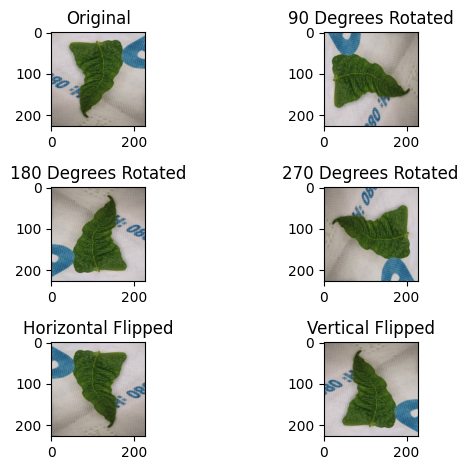

The label of original image is 2
The label of 90 degrees rotated image is 2
The label of 180 degrees rotated image is 2
The label of 270 degrees rotated image is 2
The label of horizontal flipped image is 2
The label of vertical flipped image is 2


In [21]:
index = 100

plt.figure()

plt.subplot(321)
plt.imshow(X_train[index].permute(1, 2, 0).cpu().numpy())
plt.title("Original")

plt.subplot(322)
plt.imshow(X_train[index + 800].permute(1, 2, 0).cpu().numpy())
plt.title("90 Degrees Rotated")

plt.subplot(323)
plt.imshow(X_train[index + 1600].permute(1, 2, 0).cpu().numpy())
plt.title("180 Degrees Rotated")

plt.subplot(324)
plt.imshow(X_train[index + 2400].permute(1, 2, 0).cpu().numpy())
plt.title("270 Degrees Rotated")

plt.subplot(325)
plt.imshow(X_train[index + 3200].permute(1, 2, 0).cpu().numpy())
plt.title("Horizontal Flipped")

plt.subplot(326)
plt.imshow(X_train[index + 4000].permute(1, 2, 0).cpu().numpy())
plt.title("Vertical Flipped")

plt.tight_layout()
plt.show()

print("The label of original image is", y_train[index].cpu().numpy())
print("The label of 90 degrees rotated image is", y_train[index + 800].cpu().numpy())
print("The label of 180 degrees rotated image is", y_train[index + 1600].cpu().numpy())
print("The label of 270 degrees rotated image is", y_train[index + 2400].cpu().numpy())
print("The label of horizontal flipped image is", y_train[index + 3200].cpu().numpy())
print("The label of vertical flipped image is", y_train[index + 4000].cpu().numpy())

In [22]:
X_train = X_train.float() / 255
X_test = X_test.float() / 255

In [23]:
mean = tc.mean(X_train, dim=(0, 2, 3))
std = tc.std(X_train, dim=(0, 2, 3))

In [24]:
print("Mean of X_train is", np.squeeze(mean.cpu().numpy()))
print("Standard deviation of X_train is", np.squeeze(std.cpu().numpy()))

Mean of X_train is [0.00174429 0.00199316 0.00128657]
Standard deviation of X_train is [0.00084995 0.00075324 0.00087375]


In [25]:
X_train = (X_train - mean[None, :, None, None]) / std[None, :, None, None]
X_test = (X_test - mean[None, :, None, None]) / std[None, :, None, None]

In [26]:
import torch.nn as nn
import torch.nn.init as init


class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 96, kernel_size=11, stride=4)
        self.bn1 = nn.BatchNorm2d(96)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        init.kaiming_normal_(self.conv1.weight)

        self.conv2 = nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(256)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        init.kaiming_normal_(self.conv2.weight)

        self.conv3 = nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(384)
        init.kaiming_normal_(self.conv3.weight)

        self.conv4 = nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(384)
        init.kaiming_normal_(self.conv4.weight)

        self.conv5 = nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.pool5 = nn.MaxPool2d(kernel_size=3, stride=2)
        init.kaiming_normal_(self.conv5.weight)

        self.fc6 = nn.Linear(9216, 4096)
        self.bn6 = nn.BatchNorm1d(4096)
        self.fc6_dropout = nn.Dropout(0.7)
        init.kaiming_normal_(self.fc6.weight)

        self.fc7 = nn.Linear(4096, 4096)
        self.bn7 = nn.BatchNorm1d(4096)
        self.fc7_dropout = nn.Dropout(0.5)
        init.kaiming_normal_(self.fc7.weight)

        self.fc8 = nn.Linear(4096, 5)
        init.xavier_normal_(self.fc8.weight)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = tc.relu(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = tc.relu(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = tc.relu(x)

        x = self.conv4(x)
        x = self.bn4(x)
        x = tc.relu(x)

        x = self.conv5(x)
        x = self.bn5(x)
        x = tc.relu(x)
        x = self.pool5(x)

        x = tc.flatten(x, 1)

        x = self.fc6(x)
        x = self.bn6(x)
        x = tc.relu(x)
        x = self.fc6_dropout(x)

        x = self.fc7(x)
        x = self.bn7(x)
        x = tc.relu(x)
        x = self.fc7_dropout(x)

        x = self.fc8(x)

        return x

In [27]:
import torch.optim as optim

model = AlexNet()
model = model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-3, weight_decay=1e-6)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.8)

In [28]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

epochs = 15
losses = []
val_losses = []

for epoch in range(epochs):
    epoch_loss = 0
    epoch_val_loss = 0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        epoch_loss += loss.item() * inputs.size(0)

        loss.backward()
        optimizer.step()

    scheduler.step()

    epoch_loss /= len(train_dataset)
    losses.append(epoch_loss)

    model.eval()

    with tc.no_grad():
        for inputs, targets in test_loader:
            val_outputs = model(inputs)
            val_loss = criterion(val_outputs, targets)
            epoch_val_loss += val_loss.item() * inputs.size(0)

    epoch_val_loss /= len(test_dataset)
    val_losses.append(epoch_val_loss)

    model.train()

    print(
        f"Epoch: {epoch + 1}/{epochs}, Training Loss: {losses[epoch]:.4f}, Validation Loss: {val_losses[epoch]:.4f}"
    )

Epoch: 1/15, Training Loss: 1.5353, Validation Loss: 1.6701
Epoch: 2/15, Training Loss: 1.2524, Validation Loss: 1.1089
Epoch: 3/15, Training Loss: 0.8909, Validation Loss: 0.8120
Epoch: 4/15, Training Loss: 0.6858, Validation Loss: 0.4988
Epoch: 5/15, Training Loss: 0.5027, Validation Loss: 0.5759
Epoch: 6/15, Training Loss: 0.3746, Validation Loss: 0.5602
Epoch: 7/15, Training Loss: 0.3173, Validation Loss: 0.4047
Epoch: 8/15, Training Loss: 0.2381, Validation Loss: 0.2423
Epoch: 9/15, Training Loss: 0.1997, Validation Loss: 0.2250
Epoch: 10/15, Training Loss: 0.1471, Validation Loss: 0.1439
Epoch: 11/15, Training Loss: 0.1093, Validation Loss: 0.1391
Epoch: 12/15, Training Loss: 0.1297, Validation Loss: 0.1848
Epoch: 13/15, Training Loss: 0.0833, Validation Loss: 0.1406
Epoch: 14/15, Training Loss: 0.1261, Validation Loss: 0.1113
Epoch: 15/15, Training Loss: 0.0603, Validation Loss: 0.1065


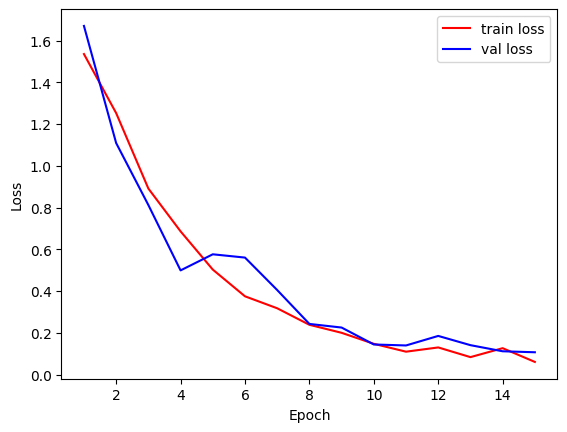

In [29]:
plt.plot(range(1, epochs + 1), losses, color="red", label="train loss")
plt.plot(range(1, epochs + 1), val_losses, color="blue", label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [30]:
train_pred = []
test_pred = []

train_loader = DataLoader(X_train, batch_size=512)
test_loader = DataLoader(X_test, batch_size=512)

model.eval()

with tc.no_grad():
    for inputs in train_loader:
        outputs = model(inputs)
        predictions = tc.argmax(outputs, dim=1)
        train_pred.append(predictions)

    for inputs in test_loader:
        outputs = model(inputs)
        predictions = tc.argmax(outputs, dim=1)
        test_pred.append(predictions)

train_pred = tc.cat(train_pred)
test_pred = tc.cat(test_pred)

In [31]:
y_train = y_train.cpu()
y_test = y_test.cpu()
train_pred = train_pred.cpu()
test_pred = test_pred.cpu()

In [32]:
from sklearn.metrics import accuracy_score

print(f"Training accuracy is {100 * accuracy_score(y_train, train_pred):.2f}%")
print(f"Testing accuracy is {100 * accuracy_score(y_test, test_pred):.2f}%")

Training accuracy is 99.85%
Testing accuracy is 96.50%


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Precision score is {100 * precision_score(y_test, test_pred, average='weighted'):.2f}%")
print(f"Recall score is {100 * recall_score(y_test, test_pred, average='weighted'):.2f}%")
print(f"F1 score is {100 * f1_score(y_test, test_pred, average='weighted'):.2f}%")

Precision score is 96.55%
Recall score is 96.50%
F1 score is 96.51%


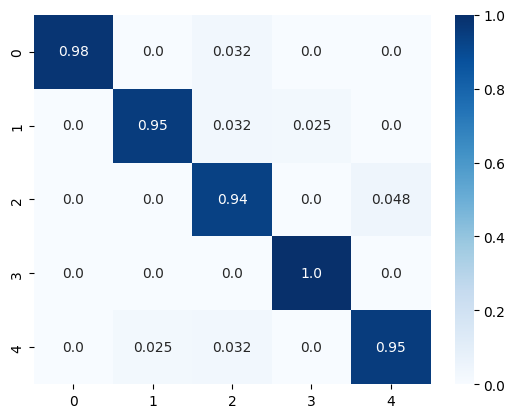

In [34]:
import seaborn as sb
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, test_pred)

sb.heatmap(cfm / np.sum(cfm, axis=1), annot=True, fmt=".2", cmap="Blues")
plt.show()

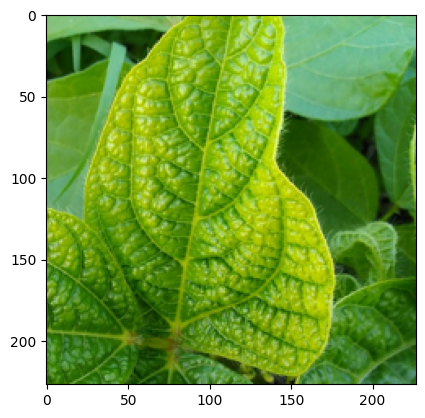

In [35]:
from PIL import Image

image = np.array(Image.open("/content/drive/My Drive/Google Colab/L1.jpg").resize((227, 227)))

plt.imshow(image)
plt.show()

In [36]:
image = tc.from_numpy(image).float()
image = image.permute(2, 0, 1)
image = image.unsqueeze(0)
image = image.cuda()

In [37]:
print("Size of image is", image.cpu().numpy().shape)

Size of image is (1, 3, 227, 227)


In [38]:
image = image / 255
image = (image - mean[None, :, None, None]) / std[None, :, None, None]

In [39]:
model.eval()

with tc.no_grad():
    prediction = tc.argmax(model(image), dim=1)

print("The leaf condition is predicted to be", dataset.classes[prediction])

The leaf condition is predicted to be leaf crinckle


In [40]:
tc.save(model, "model.pth")

In [41]:
from google.colab import files

files.download("model.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>